# Dubinin-Radushkevich and Dubinin-Astakov plots

The Dubinin-Radushkevich (DR) and Dubinin-Astakov (DA) plots are often used to
determine the pore volume and the characteristic adsorption potential of
adsorbent materials, in particular those of carbonaceous materials, such as
activated carbons, carbon black or carbon nanotubes. It is also sometimes used
for solution adsorption isotherms.

In pyGAPS, both the DR and DA plots are available with the `dr_plot` and
`da_plot` functions. First we import the example isotherms.

In [1]:
# import isotherms
%run import.ipynb
%matplotlib inline

# import the characterisation module
import pygaps.characterisation as pgc

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


Then we'll select the Takeda 5A isotherm to examine. We will perform a DR plot,
with increased verbosity to observe the resulting linear fit. The function
returns a dictionary with the calculated pore volume and adsorption potential.

Micropore volume is: 0.484 cm3/g
Effective adsorption potential is : 5.84 kJ/mol


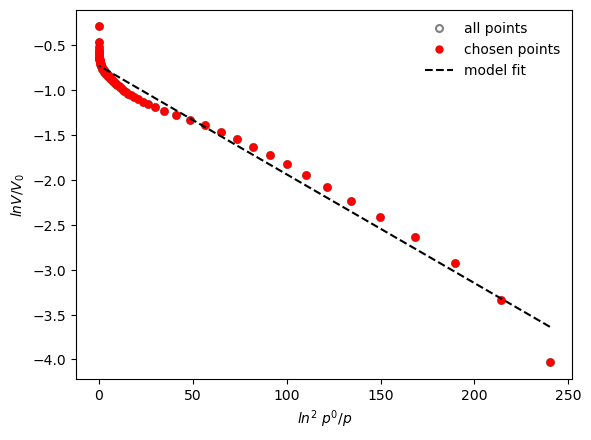

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='Takeda 5A')
results = pgc.dr_plot(isotherm, verbose=True)

We can specify the pressure limits for the DR plot, to select only the points at low pressure for a better fit.

Micropore volume is: 0.448 cm3/g
Effective adsorption potential is : 6 kJ/mol


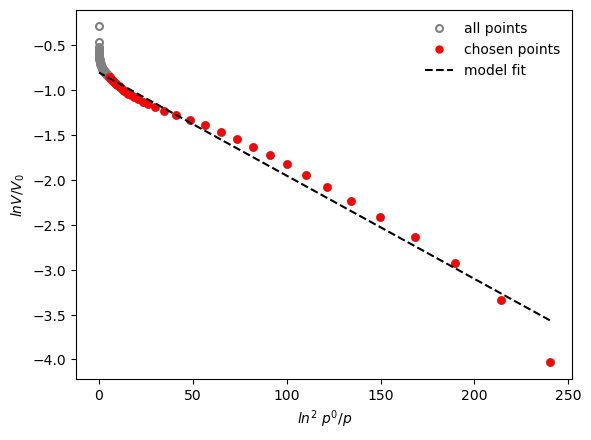

In [3]:
results = pgc.dr_plot(isotherm, p_limits=[0, 0.1], verbose=True)

An extension of the DR model is the Dubinin-Astakov (DA) model. In the DA
equation, the exponent can vary, and is usually chosen between 1 (for surfaces)
and 3 (for micropores). For an explanation of the theory, check the function
reference.

We then use the `da_plot` function and specify the exponent to be 2.3 (larger
than the standard DR exponent of 2)

Micropore volume is: 0.422 cm3/g
Effective adsorption potential is : 6.34 kJ/mol


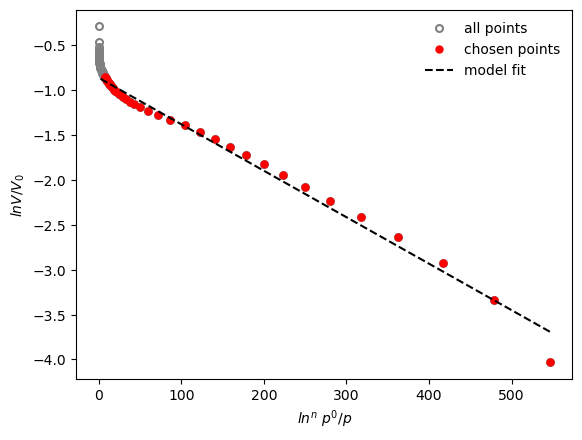

In [4]:
results = pgc.da_plot(isotherm, p_limits=[0,0.1], exp=2.3, verbose=True)

The DA plot can also automatically test which exponent gives the best fit
between 1 and 3, if the parameter is left blank. The calculated exponent is
returned in the result dictionary.

Exponent is: 3
Micropore volume is: 0.385 cm3/g
Effective adsorption potential is : 6.92 kJ/mol


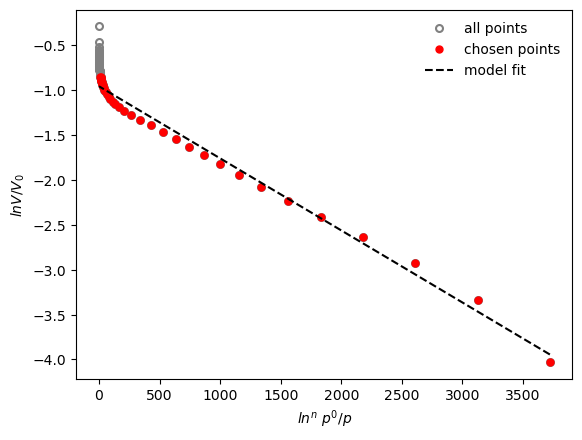

In [5]:
result = pgc.da_plot(isotherm, p_limits=[0, 0.1], exp=None, verbose=True)

More info about the method can be found in the [reference](https://pygaps.readthedocs.io/en/latest/reference/characterisation/dubinin.html).